In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
# for known bug TensorFlow: Blas GEMM launch failed
physical_devices = tf.config.list_physical_devices('GPU') 
print("GPU detected :", physical_devices)
configuration = tf.compat.v1.ConfigProto()
configuration.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=configuration)


from tensorflow.keras.layers import Conv2D 
from tensorflow.keras.layers import MaxPooling2D

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Embedding,GRU,MaxPooling1D,GlobalMaxPooling1D,BatchNormalization

from sklearn.model_selection import train_test_split

from sklearn import metrics

import matplotlib.pyplot as plt
from matplotlib import cm

import itertools

data_train = pd.read_csv('X_train_rakuten_afterEDA_preprocessing.csv',index_col=0)
data_train = data_train.reset_index(drop=False)
data_train['nom_img'] = r"C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\" + data_train['nom_img']
data_train.shape

GPU detected : [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


(84613, 6)

In [2]:
#display columns including product images (nom_img)
data_train.head()

,designation_orig,nom_img,lang_designation,designation,prdtypecode,designation_token_final
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,C:\Users\admin\Documents\projet_Rakuten\croppe...,de,olivia: notebook personnalise / pages / punks...,10,"['notebook', 'page', 'design']"
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,C:\Users\admin\Documents\projet_Rakuten\croppe...,fr,journal des art (le) n° du // art et son ma...,2280,"['journal', 'art', 'art', 'marche', 'salon', '..."
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,C:\Users\admin\Documents\projet_Rakuten\croppe...,fr,grand stylet ergonomique bleu gamepad nintendo...,50,"['stylet', 'ergonomique', 'gamepad', 'nintendo..."
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,C:\Users\admin\Documents\projet_Rakuten\croppe...,fr,peluche donald europe disneyland (marionn...,1280,"['peluche', 'donald', 'europe', 'disneyland', ..."
4,La Guerre Des Tuques Luc a des idées de grande...,C:\Users\admin\Documents\projet_Rakuten\croppe...,fr,la guerre des tuques luc a des idees de grande...,2705,"['guerre', 'luc', 'idees', 'grandeur', 'vouloi..."


In [3]:
#delete rows where images are smaller than 2k equal to noise rather than information
from pathlib import Path

list_products_to_be_deleted_due_to_too_small_image = []
nbr_to_be_deleted = 0
for i in range(len(data_train)):
    fname = data_train['nom_img'].iloc[i]
    file_size =Path(fname).stat().st_size
    if (file_size < 2048):
        print("The file {0} has a too small size of {1} bytes ".format(fname,file_size))
        list_products_to_be_deleted_due_to_too_small_image.append(i)
        nbr_to_be_deleted += 1

#rows deletion
print("number of deleted rows due to image size smaller than 2K :",nbr_to_be_deleted)
print(data_train.shape)
data_train = data_train.drop(list_products_to_be_deleted_due_to_too_small_image)
print("new shape of dataset after preprocessing : ", data_train.shape)




The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_332521213_product_46540267.jpg has a too small size of 1597 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1289984514_product_4090784667.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1216298756_product_3479934811.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1026005405_product_558486639.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1252146802_product_3845529844.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1026005681_product_558486488.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1166709808_product_2823853943.jpg has a too small size of 0 bytes 
T

The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1211351615_product_3396526513.jpg has a too small size of 1590 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1264896275_product_3928053533.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1018396218_product_510785964.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1018395303_product_510784728.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1100804971_product_1736484207.jpg has a too small size of 1827 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1249535030_product_3819980401.jpg has a too small size of 1304 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1041185312_product_824465732.jpg has a too small size of 11

The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1174588133_product_2940639052.jpg has a too small size of 1578 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1045589330_product_293227446.jpg has a too small size of 2046 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1275705008_product_4006536216.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1169778890_product_2878038864.jpg has a too small size of 1353 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1302568721_product_4155424936.jpg has a too small size of 633 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_992767787_product_300566913.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1113097250_product_1832986981.jpg has a too small size of 

The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1250261846_product_3831237327.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1026011651_product_558486945.jpg has a too small size of 683 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1203568974_product_3279391943.jpg has a too small size of 2011 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_941622258_product_207151544.jpg has a too small size of 2015 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1159687976_product_2718172568.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1323073274_product_4231410877.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1265867405_product_3935345965.jpg has a too small size of 145

In [4]:
#cell specific for text preprocessing subpart 
# column designation_token_final is the result of preprocessing text cleaning (stopwords and so on) under tokens form
# so, we transform it again into text string in designation_str_tokens that is now the features data column
# to prepare the association between each word and a integer number (index in dictionary of full vocabulary describing products)
import re
data_train['designation_str_tokens'] = ""
for i in range(len(data_train)):
    data_train['designation_str_tokens'].iloc[i] += "".join(data_train['designation_token_final'].iloc[i]) 

data_train['designation_str_tokens'] = data_train['designation_str_tokens'].map(lambda x: re.sub(r',', '', x))
data_train['designation_str_tokens'] = data_train['designation_str_tokens'].map(lambda x: re.sub(r"'", '', x))


C:\Users\admin\.conda\envs\tf-keras-gpu-test\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [5]:
#training and validation set , not yet test set 
target = data_train.prdtypecode
data_train = data_train.drop(['designation_orig','lang_designation','designation','designation_token_final','prdtypecode'],axis=1)

#Divide randomly data into training and validation set
#maintaining proportion of classes equal (stratify option)
X_train, X_test, y_train, y_test = train_test_split(data_train,target, test_size=0.2, random_state=42)

df_train = pd.concat([X_train,y_train],axis=1)
df_train = df_train.reset_index(drop=True)
df_test = pd.concat([X_test,y_test],axis=1)
df_test = df_test.reset_index(drop=True)

name_class = ['editions','magazines',"equipement_playstation","jouets_enfant","livres","fournitures_scolaires","materiel_jardin","mobilier_interieur","jeux_enfants","literie","livres_par_lot","figurine","materiel_piscine","univers_de_fiction","equipements_telecommandes","materiel_jeux_video","jeux_de_cartes_collection","decoration","jeux_video","console_de_jeu","materiel_bebe","peche_lampe_plein_air","materiel_animaux_compagnie","jeux_sur_PC","accessoires_outil","articles_nourriture","vetements_nouveau-né_et_billard_flechettes"] 
list_class = [10, 2280 ,  50 ,1280 ,2705, 2522, 2582, 1560, 1281, 1920, 2403, 1140, 2583, 1180, 1300 ,2462, 1160, 2060 , 40,   60 ,1320 ,1302 ,2220 ,2905, 2585, 1940 ,1301]       
list_class_onehot = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]

# df_train and df_test will be used to build the batchs !!!!!!
df_train['class_onehot']= 0
for i in range(len(df_train)):
    index = list_class.index(df_train['prdtypecode'].iloc[i])
    df_train['class_onehot'].iloc[i] = list_class_onehot[index]

df_test['class_onehot']= 0
for i in range(len(df_test)):
    index = list_class.index(df_test['prdtypecode'].iloc[i])
    df_test['class_onehot'].iloc[i] = list_class_onehot[index]

display(df_train.head(50))

print("\ndimension training set :",df_train.shape)
print("dimension test set :",df_test.shape)


,nom_img,designation_str_tokens,prdtypecode,class_onehot
0,C:\Users\admin\Documents\projet_Rakuten\croppe...,[taggl jeu carte taggl faire joueur repartir j...,1281,8
1,C:\Users\admin\Documents\projet_Rakuten\croppe...,[kinder zimmer dekoration brief kissen englisc...,1920,9
2,C:\Users\admin\Documents\projet_Rakuten\croppe...,[herlitz pochette classement easy orga pastel ...,2522,5
3,C:\Users\admin\Documents\projet_Rakuten\croppe...,[ici pays quebec milieu xix siecle nombreux pi...,2705,4
4,C:\Users\admin\Documents\projet_Rakuten\croppe...,[bache bulle bordee ubbink bach bulle piscine ...,2583,12
5,C:\Users\admin\Documents\projet_Rakuten\croppe...,[baldiflex topper surmatelas mousse memoire fo...,1560,7
6,C:\Users\admin\Documents\projet_Rakuten\croppe...,[point vue mariage fille duc],2280,1
7,C:\Users\admin\Documents\projet_Rakuten\croppe...,[rechargeable lipo capacite batterie accessoir...,1300,14
8,C:\Users\admin\Documents\projet_Rakuten\croppe...,[peluche couverture hercule],1280,3
9,C:\Users\admin\Documents\projet_Rakuten\croppe...,[retro console jeu poch bit pouce lcd enfant j...,60,19



dimension training set : (67500, 4)
dimension test set : (16876, 4)


In [6]:
# tokenizer definition
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=49507)
# update tokenizer dictionary 
tokenizer.fit_on_texts(df_train['designation_str_tokens'])

#Store dictionary associating word and index in variable word2idx
word2idx = tokenizer.word_index

#Store dictionary associating index and word in variable idx2word
idx2word = tokenizer.index_word

#Store dictionary size
vocab_size = tokenizer.num_words

print("vocabulary dictionary size imposed :",vocab_size)
print("length of dictionary :",len(word2idx))
print("")
print("notebook to be converted in :",word2idx["notebook"])
print("page to be converted in :",word2idx["page"])
print("design to be converted in :",word2idx["design"])
print("")
print("entire dictionary :")
print(idx2word)

vocabulary dictionary size imposed : 49507
length of dictionary : 49507

notebook to be converted in : 8047
page to be converted in : 436
design to be converted in : 43

entire dictionary :
{1: 'piscine', 2: 'eau', 3: 'enfant', 4: 'jeu', 5: 'materiel', 6: 'oreiller', 7: 'acier', 8: 'lumiere', 9: 'coussin', 10: 'batterie', 11: 'decoration', 12: 'faire', 13: 'sac', 14: 'produire', 15: 'jouet', 16: 'main', 17: 'led', 18: 'materiau', 19: 'hauteur', 20: 'image', 21: 'cadeau', 22: 'type', 23: 'mode', 24: 'paquet', 25: 'carte', 26: 'raison', 27: 'protection', 28: 'interieur', 29: 'maison', 30: 'mesure', 31: 'contenu', 32: 'permettre', 33: 'pompe', 34: 'forme', 35: 'voiture', 36: 'plastique', 37: 'emballage', 38: 'sol', 39: 'produit', 40: 'temps', 41: 'volume', 42: 'anti', 43: 'design', 44: 'autre', 45: 'forfait', 46: 'marqu', 47: 'filtration', 48: 'diamant', 49: 'manuel', 50: 'durable', 51: 'noel', 52: 'kit', 53: 'couverture', 54: 'air', 55: 'parfait', 56: 'fonction', 57: 'utilisation', 58: '

In [ ]:
#old working cell no more useful BUT  
#only kept to show memory error and illustrate 
#why it is impossible to pass to fit method the complete set of transformed data inside huge numpy arrays !!!!!
import time
#so it is mandatory to work with batch :-)
#
#X_train_4D = np.stack(preprocess_image(df_train['nom_img'].iloc[i],(150,150,3)) for i in range(len(df_train)))
#  File "<__array_function__ internals>", line 6, in stack
#  File "C:\Users\admin\.conda\envs\tf-keras-gpu-test\lib\site-packages\numpy\core\shape_base.py", line 434, in stack
#    return _nx.concatenate(expanded_arrays, axis=axis, out=out)
#  File "<__array_function__ internals>", line 6, in concatenate
#MemoryError: Unable to allocate 17.0 GiB for an array with shape (67500, 150, 150, 3) and data type float32

def preprocess_image(img_path,target_size):
    
    image = tf.keras.preprocessing.image.load_img(img_path)
    image_arr = tf.keras.preprocessing.image.img_to_array(image)

    image_arr = tf.image.resize(image_arr,(target_size[0], target_size[1])).numpy()
    # shape of image_arr is (150,150,3)
        
    return image_arr/255.

#Converting image into a tensor 4D
start = time.time()
X_train_4D = np.stack(preprocess_image(df_train['nom_img'].iloc[i],(150,150,3)) for i in range(len(df_train)))

X_test_4D = np.stack(preprocess_image(df_test['nom_img'].iloc[i],(150,150,3)) for i in range(len(df_train)))

y_train = np.stack(df_train['class_onehot'].iloc[i] for i in range(len(df_train)))

end = time.time()
elapsed = round((end - start)/60)

print(f'\ncell execution duration : {elapsed:.2f} mn')


C:\Users\admin\.conda\envs\tf-keras-gpu-test\lib\site-packages\IPython\core\interactiveshell.py:3263: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\admin\.conda\envs\tf-keras-gpu-test\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-aeb4684d0f5c>", line 16, in <module>
    X_train_4D = np.stack(preprocess_image(df_train['nom_img'].iloc[i],(150,150,3)) for i in range(len(df_train)))
  File "<__array_function__ internals>", line 6, in stack
  File "C:\Users\admin\.conda\envs\tf-keras-gpu-test\lib\site-packages\numpy\core\shape_base.py", line 434, in stack
    return _nx.concatenate(expanded_arrays, axis=axis, out=out)
  File "<__array_function__ internals>", line 6, in concatenate
MemoryError: Unable to allocate 17.0 GiB for an array with shape (67500, 150, 150, 3) and data type float32

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\admin\.conda\envs\tf-keras-gpu-test\lib\site-packages\IPython\core\inte

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\admin\.conda\envs\tf-keras-gpu-test\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-aeb4684d0f5c>", line 16, in <module>
    X_train_4D = np.stack(preprocess_image(df_train['nom_img'].iloc[i],(150,150,3)) for i in range(len(df_train)))
  File "<__array_function__ internals>", line 6, in stack
  File "C:\Users\admin\.conda\envs\tf-keras-gpu-test\lib\site-packages\numpy\core\shape_base.py", line 434, in stack
    return _nx.concatenate(expanded_arrays, axis=axis, out=out)
  File "<__array_function__ internals>", line 6, in concatenate
MemoryError: Unable to allocate 17.0 GiB for an array with shape (67500, 150, 150, 3) and data type float32

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\admin\.conda\envs\tf-keras-gpu-test\lib\site-packages\IPython\core\inte

# Use case : image + text handling with minimum classifier one Dense layer
**image chain : pretrained VGG16**<br>
**text  chain : embedding + GRU layers**<br>

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

max_features=49507
# Modèle VGG16
base_model = VGG16(weights='imagenet', include_top=False,input_shape=(150,150,3))
# Freezer les couches du VGG16
for layer in base_model.layers: 
    layer.trainable = False


image_input = tf.keras.Input(shape=(150,150,3),name="image_input")
x = base_model(image_input)
encoded_image = Flatten()(x)

text_input = tf.keras.Input(shape=(200),name="text_input")
embedded_text = Embedding(max_features+1,640)(text_input)
y = GRU(640)(embedded_text)
encoded_txt = Flatten()(y)

# Concatenate both encoded images and text and pass through the classification layer.
concatenated = tf.keras.layers.Concatenate()([encoded_image, encoded_txt])
outputs = tf.keras.layers.Dense(27, activation="softmax")(concatenated)


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_input (InputLayer)         [(None, 200)]        0                                            
__________________________________________________________________________________________________
image_input (InputLayer)        [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 200, 640)     31685120    text_input[0][0]                 
__________________________________________________________________________________________________
vgg16 (Model)                   (None, 4, 4, 512)    14714688    image_input[0][0]                
______________________________________________________________________________________________

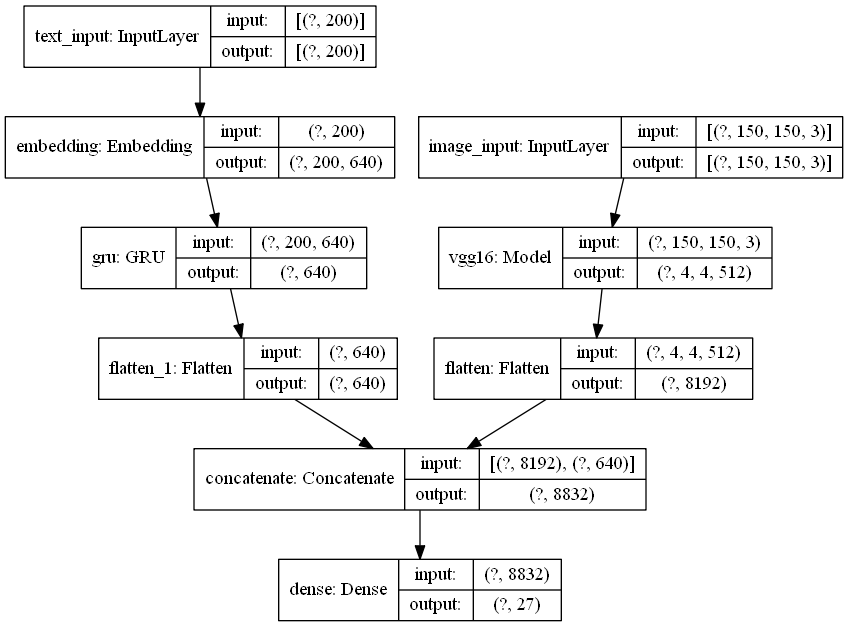

In [8]:
#instanciate a model with two input tensors and a simple classifier based on one Dense layer
multimodal_model = tf.keras.Model([image_input,text_input],outputs)
# summarize layers
print(multimodal_model.summary())
tf.keras.utils.plot_model(multimodal_model, show_shapes=True)

In [7]:
# creation of customized Data Generator 
# cell to be executed for any model  !!!!!!!!!!!!!!!!

class CustomDataGen(tf.keras.utils.Sequence):
    def __init__(self, df, X_col_img, X_col_txt, y_col,
                 batch_size,
                 input_size=(150, 150, 3),input_text_size=200,
                 shuffle=False):
        
        self.df = df.copy()
        self.X_col_img = X_col_img
        self.X_col_txt = X_col_txt
        self.y_col = y_col
        self.batch_size = batch_size
        self.input_size = input_size
        self.input_text_size = input_text_size
        self.shuffle = shuffle
        
        self.n = len(self.df)
        self.n_classes = df[y_col['class_onehot']].nunique()
        
    def on_epoch_end(self):
        pass
    
    def __get_input_img(self, path, target_size):
        
        image = tf.keras.preprocessing.image.load_img(path)
        image_arr = tf.keras.preprocessing.image.img_to_array(image)

        image_arr = tf.image.resize(image_arr,(target_size[0], target_size[1])).numpy()
        # shape of image_arr is (150,150,3)
        return image_arr/255.
    
    def __get_input_txt(self, text, size):

        X_text_int = tokenizer.texts_to_sequences([text])
        #pad or truncate list of integers
        X_text = tf.keras.preprocessing.sequence.pad_sequences(X_text_int,maxlen=size,padding='post',truncating='post')
        #only return the list not a list of one list !!!!!!
        return X_text[0]
    
    def __get_output(self, label, num_classes):
        return tf.keras.utils.to_categorical(label, num_classes=num_classes)
    
    def __get_data(self, batches):
        # Generates data containing batch_size samples

        image_batch = batches[self.X_col_img['nom_img']]
        
        text_batch = batches[self.X_col_txt['designation_str_tokens']]
                
        class_batch = batches[self.y_col['class_onehot']]
        
        X_batch_img = np.stack([self.__get_input_img(x, self.input_size) for x in image_batch])
        
        X_batch_txt = np.stack([self.__get_input_txt(x, self.input_text_size) for x in text_batch])

        y_batch = np.stack([self.__get_output(y, self.n_classes) for y in class_batch])

        return X_batch_img, X_batch_txt, y_batch
    
    def __getitem__(self, index):
        
        #index is managed by fit method as it is a subclass of Sequence Class
        batches = self.df[index * self.batch_size:(index + 1) * self.batch_size]
        X_img, X_txt, y = self.__get_data(batches)
        return [X_img, X_txt], y
    
    
    def __len__(self):
        return self.n // self.batch_size 

In [ ]:
import time
#CategoricalCrossentropy : Computes the crossentropy loss between the labels and predictions
#CategoricalAccuracy :  Calculates how often predictions match one-hot labels.
multimodal_model.compile(
    optimizer=tf.keras.optimizers.Adam(), loss=[tf.keras.losses.CategoricalCrossentropy()],
    metrics=[tf.keras.metrics.CategoricalAccuracy()])


# training of the functional model multimodal (Image + text)
import time
traingen = CustomDataGen(df_train,
                         X_col_img={'nom_img':'nom_img'},
                         X_col_txt={'designation_str_tokens':'designation_str_tokens'},
                         y_col={'class_onehot': 'class_onehot'},
                         batch_size=32, input_size=(150, 150, 3),input_text_size=200)

print(type(traingen))

valgen = CustomDataGen(df_test,
                       X_col_img={'nom_img':'nom_img'},
                       X_col_txt={'designation_str_tokens':'designation_str_tokens'},
                       y_col={'class_onehot': 'class_onehot'},
                       batch_size=32, input_size=(150, 150, 3),input_text_size=200)

start = time.time()
history = multimodal_model.fit(traingen,validation_data=valgen,epochs=10)
end = time.time()
elapsed = round((end - start)/60)

print(f'\ncell execution duration : {elapsed:.2f} mn')

# Use case : image + text handling with a classifier composed of 2 Dense layers
**image chain : pretrained VGG16**<br>
**text  chain : embedding + GRU layers**<br>

In [10]:
from tensorflow.keras.applications.vgg16 import VGG16

max_features=49507
# Modèle VGG16
base_model = VGG16(weights='imagenet', include_top=False,input_shape=(150,150,3))
# Freezer les couches du VGG16
for layer in base_model.layers: 
    layer.trainable = False


image_input = tf.keras.Input(shape=(150,150,3),name="image_input")
x = base_model(image_input)
encoded_image = Flatten()(x)

text_input = tf.keras.Input(shape=(200),name="text_input")
embedded_text = Embedding(max_features+1,640)(text_input)
y = GRU(640)(embedded_text)
encoded_txt = Flatten()(y)

# Concatenate both encoded images and text and pass through the classification layer.
concatenated = tf.keras.layers.Concatenate()([encoded_image, encoded_txt])
classifier_lay1 = tf.keras.layers.Dense(64, activation="relu")(concatenated)
classifier_lay2 = tf.keras.layers.Dropout(0.2)(classifier_lay1)
outputs = tf.keras.layers.Dense(27, activation="softmax")(classifier_lay2)
    


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_input (InputLayer)         [(None, 200)]        0                                            
__________________________________________________________________________________________________
image_input (InputLayer)        [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 200, 640)     31685120    text_input[0][0]                 
__________________________________________________________________________________________________
vgg16 (Model)                   (None, 4, 4, 512)    14714688    image_input[0][0]                
____________________________________________________________________________________________

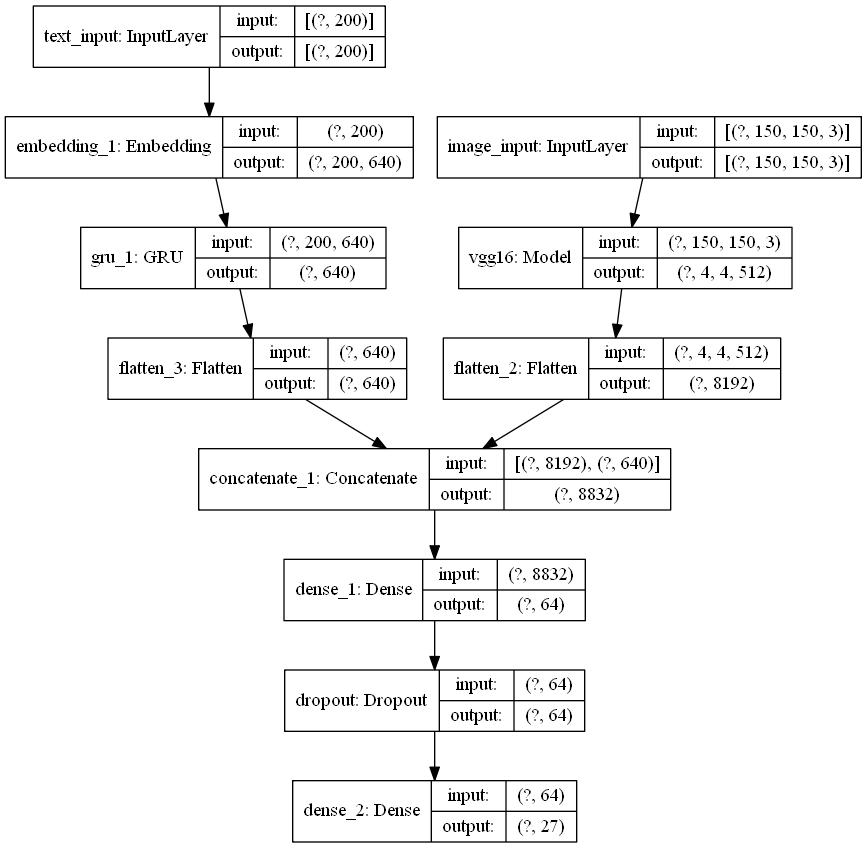

In [11]:
#instanciate a model with two input tensors and a classifier composed of 2 dense layers
multimodal_model1 = tf.keras.Model([image_input,text_input],outputs)
# summarize layers
print(multimodal_model1.summary())
tf.keras.utils.plot_model(multimodal_model1, show_shapes=True)

In [13]:
import time
#CategoricalCrossentropy : Computes the crossentropy loss between the labels and predictions
#CategoricalAccuracy :  Calculates how often predictions match one-hot labels.
multimodal_model1.compile(
    optimizer=tf.keras.optimizers.Adam(), loss=[tf.keras.losses.CategoricalCrossentropy()],
    metrics=[tf.keras.metrics.CategoricalAccuracy()])


# training of the fucntional model multimodal (Image + text)
import time
traingen = CustomDataGen(df_train,
                         X_col_img={'nom_img':'nom_img'},
                         X_col_txt={'designation_str_tokens':'designation_str_tokens'},
                         y_col={'class_onehot': 'class_onehot'},
                         batch_size=32, input_size=(150, 150, 3),input_text_size=200)

print(type(traingen))

valgen = CustomDataGen(df_test,
                       X_col_img={'nom_img':'nom_img'},
                       X_col_txt={'designation_str_tokens':'designation_str_tokens'},
                       y_col={'class_onehot': 'class_onehot'},
                       batch_size=32, input_size=(150, 150, 3),input_text_size=200)

start = time.time()
history = multimodal_model1.fit(traingen,validation_data=valgen,epochs=10)
end = time.time()
elapsed = round((end - start)/60)

print(f'\ncell execution duration : {elapsed:.2f} mn')

ERROR! Session/line number was not unique in database. History logging moved to new session 331
<class '__main__.CustomDataGen'>
  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 2109 steps, validate for 527 steps
Epoch 1/10
2109/2109 [==============================] - 1059s 502ms/step - loss: 1.9726 - categorical_accuracy: 0.4144 - val_loss: 1.1486 - val_categorical_accuracy: 0.6481
Epoch 2/10
2109/2109 [==============================] - 1049s 497ms/step - loss: 1.0401 - categorical_accuracy: 0.6715 - val_loss: 0.7485 - val_categorical_accuracy: 0.7791
Epoch 3/10
2109/2109 [==============================] - 1052s 499ms/step - loss: 0.7101 - categorical_accuracy: 0.7759 - val_loss: 0.6532 - val_categorical_accuracy: 0.8118
Epoch 4/10
2109/2109 [==============================] - 1052s 499ms/step - loss: 0.5497 - categorical_accuracy: 0.8240 - val_loss: 0.6718 - val_categorical_accuracy: 0.8203
Epoch 5/10
2109/2109 [==============================] - 1054s 500ms/step - loss: 0.4573 - categorical_accuracy: 0.8519 - val_loss: 0.7096 - val_categorical_accuracy: 0.8235
Epoch 6/10
2109/2109 [==============================] - 1053s 499ms/step - loss: 0.3961 - 

# Bad use case : image + text handling twice with a classifier composed of 2 Dense layers
**image chain : pretrained VGG16**<br>
**text  chain : embedding + GRU layers**<br>
**second text  chain : embedding + GRU layers**<br>

In [12]:
from tensorflow.keras.applications.vgg16 import VGG16

max_features=49507
# Modèle VGG16
base_model = VGG16(weights='imagenet', include_top=False,input_shape=(150,150,3))
# Freezer les couches du VGG16
for layer in base_model.layers: 
    layer.trainable = False


image_input = tf.keras.Input(shape=(150,150,3),name="image_input")
x = base_model(image_input)
encoded_image = Flatten()(x)

text_input = tf.keras.Input(shape=(200),name="text_input")
embedded_text = Embedding(max_features+1,640)(text_input)
y = GRU(640)(embedded_text)
encoded_txt = Flatten()(y)

textbis_input = tf.keras.Input(shape=(200),name="textbis_input")
embedded_textbis = Embedding(max_features+1,640)(textbis_input)
ybis = GRU(640)(embedded_textbis)
encoded_txtbis = Flatten()(ybis)


# Concatenate both encoded images and text and pass through the classification layer.
concatenated = tf.keras.layers.Concatenate()([encoded_image, encoded_txt,encoded_txtbis])
classifier_lay1 = tf.keras.layers.Dense(64, activation="relu")(concatenated)
classifier_lay2 = tf.keras.layers.Dropout(0.2)(classifier_lay1)
outputs = tf.keras.layers.Dense(27, activation="softmax")(classifier_lay2)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_input (InputLayer)         [(None, 200)]        0                                            
__________________________________________________________________________________________________
textbis_input (InputLayer)      [(None, 200)]        0                                            
__________________________________________________________________________________________________
image_input (InputLayer)        [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 200, 640)     31685120    text_input[0][0]                 
____________________________________________________________________________________________

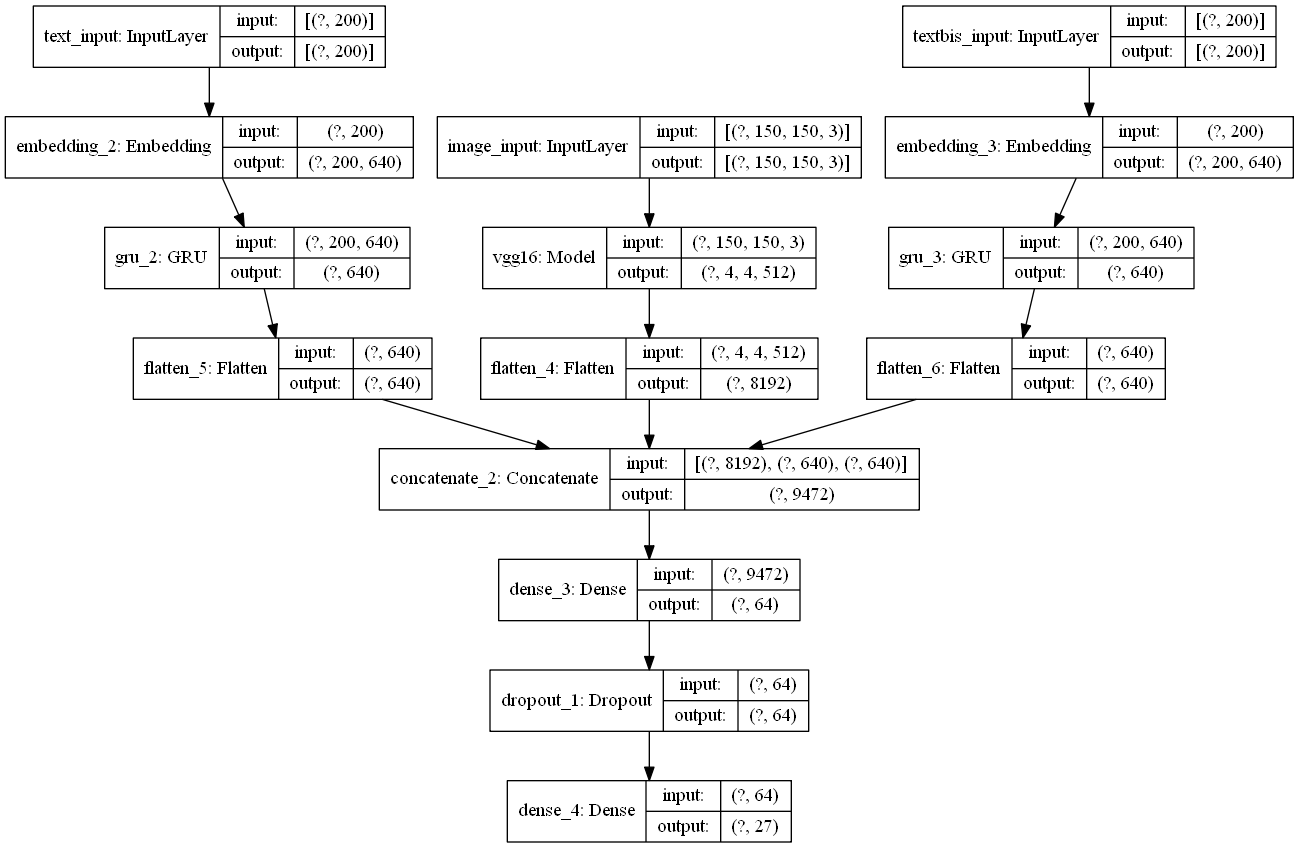

In [13]:
#instanciate a model with three input tensors (image and text twice as unimodal model based on text is much better ) 
#duplicate input as i don't know yet if a mechanism exists to ponderate 
#and a classifier composed of 2 dense layers
# !!!!!!!!!!!!!!!! trés mauvaise inspiration : performance désastreuse  !!!!!!!!!!!!
# le modéle dysfonctionne, meme la partie training (loss et accuracy) ne suit pas une trajectoire ascendante, croissante
# il y a un vrai deadlock , tombé dans un minima local.....
multimodal_model2 = tf.keras.Model([image_input,text_input,textbis_input],outputs)
# summarize layers
print(multimodal_model2.summary())
tf.keras.utils.plot_model(multimodal_model2, show_shapes=True)

In [9]:
# creation of customized Data Generator 
# cell to be executed for any model

class CustomDataGenb(tf.keras.utils.Sequence):
    def __init__(self, df, X_col_img, X_col_txt, y_col,
                 batch_size,
                 input_size=(150, 150, 3),input_text_size=200,
                 shuffle=False):
        
        self.df = df.copy()
        self.X_col_img = X_col_img
        self.X_col_txt = X_col_txt
        self.y_col = y_col
        self.batch_size = batch_size
        self.input_size = input_size
        self.input_text_size = input_text_size
        self.shuffle = shuffle
        
        self.n = len(self.df)
        self.n_classes = df[y_col['class_onehot']].nunique()
        
    def on_epoch_end(self):
        pass
    
    def __get_input_img(self, path, target_size):
        
        image = tf.keras.preprocessing.image.load_img(path)
        image_arr = tf.keras.preprocessing.image.img_to_array(image)

        image_arr = tf.image.resize(image_arr,(target_size[0], target_size[1])).numpy()
        # shape of image_arr is (150,150,3)
        return image_arr/255.
    
    def __get_input_txt(self, text, size):

        X_text_int = tokenizer.texts_to_sequences([text])
        #pad or truncate list of integers
        X_text = tf.keras.preprocessing.sequence.pad_sequences(X_text_int,maxlen=size,padding='post',truncating='post')
        #only return the list not a list of one list !!!!!!
        return X_text[0]
    
    def __get_output(self, label, num_classes):
        return tf.keras.utils.to_categorical(label, num_classes=num_classes)
    
    def __get_data(self, batches):
        # Generates data containing batch_size samples

        image_batch = batches[self.X_col_img['nom_img']]
        
        text_batch = batches[self.X_col_txt['designation_str_tokens']]
                
        class_batch = batches[self.y_col['class_onehot']]
        
        X_batch_img = np.stack([self.__get_input_img(x, self.input_size) for x in image_batch])
        
        X_batch_txt = np.stack([self.__get_input_txt(x, self.input_text_size) for x in text_batch])

        y_batch = np.stack([self.__get_output(y, self.n_classes) for y in class_batch])

        return X_batch_img, X_batch_txt, y_batch
    
    def __getitem__(self, index):
        
        #index is managed by fit method as it is a subclass of Sequence Class
        batches = self.df[index * self.batch_size:(index + 1) * self.batch_size]
        X_img, X_txt, y = self.__get_data(batches)
        return [X_img, X_txt, X_txt], y
    
    
    def __len__(self):
        return self.n // self.batch_size 

ERROR! Session/line number was not unique in database. History logging moved to new session 382


In [17]:
import time
#CategoricalCrossentropy : Computes the crossentropy loss between the labels and predictions
#CategoricalAccuracy :  Calculates how often predictions match one-hot labels.
multimodal_model2.compile(
    optimizer=tf.keras.optimizers.Adam(), loss=[tf.keras.losses.CategoricalCrossentropy()],
    metrics=[tf.keras.metrics.CategoricalAccuracy()])


# training of the functional model multimodal (Image + text)
import time
traingenb = CustomDataGenb(df_train,
                         X_col_img={'nom_img':'nom_img'},
                         X_col_txt={'designation_str_tokens':'designation_str_tokens'},
                         y_col={'class_onehot': 'class_onehot'},
                         batch_size=32, input_size=(150, 150, 3),input_text_size=200)


valgenb = CustomDataGenb(df_test,
                       X_col_img={'nom_img':'nom_img'},
                       X_col_txt={'designation_str_tokens':'designation_str_tokens'},
                       y_col={'class_onehot': 'class_onehot'},
                       batch_size=32, input_size=(150, 150, 3),input_text_size=200)

start = time.time()
history = multimodal_model2.fit(traingenb,validation_data=valgenb,epochs=10)
end = time.time()
elapsed = round((end - start)/60)

print(f'\ncell execution duration : {elapsed:.2f} mn')

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 2109 steps, validate for 527 steps
Epoch 1/10
2109/2109 [==============================] - 1545s 732ms/step - loss: 2.6911 - categorical_accuracy: 0.2391 - val_loss: 3.1235 - val_categorical_accuracy: 0.1214
Epoch 2/10
2109/2109 [==============================] - 1532s 726ms/step - loss: 3.1023 - categorical_accuracy: 0.1204 - val_loss: 3.0912 - val_categorical_accuracy: 0.1214
Epoch 3/10
2109/2109 [==============================] - 1539s 730ms/step - loss: 3.0945 - categorical_accuracy: 0.1204 - val_loss: 3.0903 - val_categorical_accuracy: 0.1214
Epoch 4/10
2109/2109 [==============================] - 1538s 729ms/step - loss: 3.0942 - categorical_accuracy: 0.1204 - val_loss: 3.0903 - val_categorical_accuracy: 0.1214
Epoch 5/10
2109/2109 [==============================] - 1528s 725ms/step - loss: 3.0942 - categorical_accuracy: 0.1204 - val_loss: 3.0903 - val_categorical_accuracy: 0.1214
Epoch 6/10
2109/2109 [==============================] - 1530s 726ms/step - loss: 3.0941 - 

# Bad use case : image + text handling and text concatenated twice before classifier composed of 2 Dense layers

**image chain : pretrained VGG16**<br>
**text chain : embedding + GRU layers**<br>


In [17]:
from tensorflow.keras.applications.vgg16 import VGG16

max_features=49507
# Modèle VGG16
base_model = VGG16(weights='imagenet', include_top=False,input_shape=(150,150,3))
# Freezer les couches du VGG16
for layer in base_model.layers: 
    layer.trainable = False


image_input = tf.keras.Input(shape=(150,150,3),name="image_input")
x = base_model(image_input)
encoded_image = Flatten()(x)

text_input = tf.keras.Input(shape=(200),name="text_input")
embedded_text = Embedding(max_features+1,640)(text_input)
y = GRU(640)(embedded_text)
encoded_txt = Flatten()(y)

# Concatenate both encoded images and text twice (!!!!) and pass through the classification layer.
concatenated3 = tf.keras.layers.Concatenate()([encoded_image, encoded_txt, encoded_txt])
classifier_lay1 = tf.keras.layers.Dense(64, activation="relu")(concatenated3)
classifier_lay2 = tf.keras.layers.Dropout(0.2)(classifier_lay1)
outputs = tf.keras.layers.Dense(27, activation="softmax")(classifier_lay2)

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_input (InputLayer)         [(None, 200)]        0                                            
__________________________________________________________________________________________________
image_input (InputLayer)        [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 200, 640)     31685120    text_input[0][0]                 
__________________________________________________________________________________________________
vgg16 (Model)                   (None, 4, 4, 512)    14714688    image_input[0][0]                
____________________________________________________________________________________________

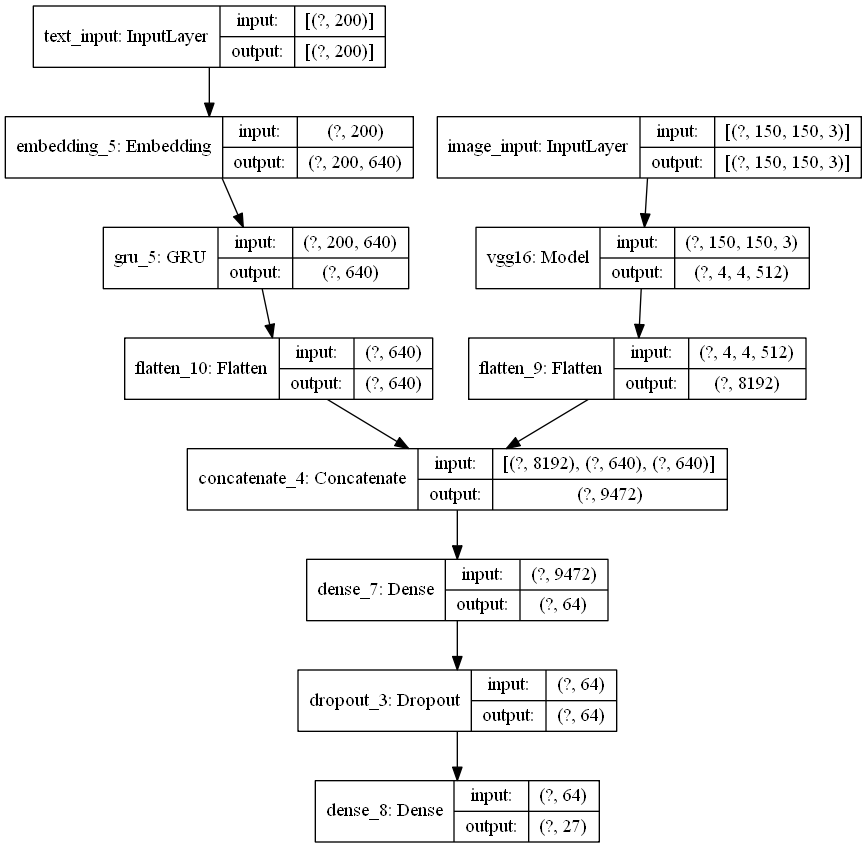

In [19]:
#instanciate a model with two input tensors and a classifier composed of 2 dense layers
#but when concatenate is done, the encoded text is duplicated 
#(always to try to  to give more importance to features coming from the unimodal model based on text much better) 
#and a classifier composed of 2 dense layers
# le modéle est poussif , la redondance des features basées sur le texte n'apporte pas de plus value voir meme est genante
multimodal_model3 = tf.keras.Model([image_input,text_input],outputs)
# summarize layers
print(multimodal_model3.summary())
tf.keras.utils.plot_model(multimodal_model3, show_shapes=True)

In [20]:
import time
#CategoricalCrossentropy : Computes the crossentropy loss between the labels and predictions
#CategoricalAccuracy :  Calculates how often predictions match one-hot labels.
multimodal_model3.compile(
    optimizer=tf.keras.optimizers.Adam(), loss=[tf.keras.losses.CategoricalCrossentropy()],
    metrics=[tf.keras.metrics.CategoricalAccuracy()])


# training of the fucntional model multimodal (Image + text)
import time
traingen = CustomDataGen(df_train,
                         X_col_img={'nom_img':'nom_img'},
                         X_col_txt={'designation_str_tokens':'designation_str_tokens'},
                         y_col={'class_onehot': 'class_onehot'},
                         batch_size=32, input_size=(150, 150, 3),input_text_size=200)

print(type(traingen))

valgen = CustomDataGen(df_test,
                       X_col_img={'nom_img':'nom_img'},
                       X_col_txt={'designation_str_tokens':'designation_str_tokens'},
                       y_col={'class_onehot': 'class_onehot'},
                       batch_size=32, input_size=(150, 150, 3),input_text_size=200)

start = time.time()
history = multimodal_model3.fit(traingen,validation_data=valgen,epochs=10)
end = time.time()
elapsed = round((end - start)/60)

print(f'\ncell execution duration : {elapsed:.2f} mn')

ERROR! Session/line number was not unique in database. History logging moved to new session 334
<class '__main__.CustomDataGen'>
  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 2109 steps, validate for 527 steps
Epoch 1/10
2109/2109 [==============================] - 1067s 506ms/step - loss: 2.2379 - categorical_accuracy: 0.3518 - val_loss: 1.9140 - val_categorical_accuracy: 0.4377
Epoch 2/10
2109/2109 [==============================] - 1063s 504ms/step - loss: 1.8608 - categorical_accuracy: 0.4436 - val_loss: 1.6561 - val_categorical_accuracy: 0.5061
Epoch 3/10
2109/2109 [==============================] - 1062s 504ms/step - loss: 1.6151 - categorical_accuracy: 0.5015 - val_loss: 1.5318 - val_categorical_accuracy: 0.5302
Epoch 4/10
2109/2109 [==============================] - 1061s 503ms/step - loss: 1.4329 - categorical_accuracy: 0.5470 - val_loss: 1.4315 - val_categorical_accuracy: 0.5703
Epoch 5/10
2109/2109 [==============================] - 1064s 504ms/step - loss: 1.2976 - categorical_accuracy: 0.5840 - val_loss: 1.3816 - val_categorical_accuracy: 0.5857
Epoch 6/10
2109/2109 [==============================] - 1059s 502ms/step - loss: 1.1859 - 

# Use case : image + text handling with a classifier composed of 2 Dense layers with a BatchNormalization layer between
## Best multimodal model 
**image chain : pretrained VGG16**<br>
**text chain : embedding + GRU layers**<br>

In [10]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import BatchNormalization

#
# !!!!!!!!!!!!!!!!!!!!!  the best model found !!!!!!!!!!!!!!!
#

max_features=49507
# Modèle VGG16
base_model = VGG16(weights='imagenet', include_top=False,input_shape=(150,150,3))
# Freezer les couches du VGG16
for layer in base_model.layers: 
    layer.trainable = False


image_input = tf.keras.Input(shape=(150,150,3),name="image_input")
x = base_model(image_input)
encoded_image = Flatten()(x)

text_input = tf.keras.Input(shape=(200),name="text_input")
embedded_text = Embedding(max_features+1,640)(text_input)
y = GRU(640)(embedded_text)
encoded_txt = Flatten()(y)

# Concatenate both encoded images and text and pass through the classification layer.
#Normalization is mandatory for Neural Network with numerous hidden layers
#but this design pattern is anyway useful to ease weights calculation during descent gradient backpropagation 

concatenated = tf.keras.layers.Concatenate()([encoded_image, encoded_txt])
classifier_lay1 = tf.keras.layers.Dense(64, activation="relu")(concatenated)
classifier_lay2 = tf.keras.layers.BatchNormalization()(classifier_lay1)
classifier_lay3 = tf.keras.layers.Dropout(0.2)(classifier_lay2)
outputs = tf.keras.layers.Dense(27, activation="softmax")(classifier_lay3)

ERROR! Session/line number was not unique in database. History logging moved to new session 385


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_input (InputLayer)         [(None, 200)]        0                                            
__________________________________________________________________________________________________
image_input (InputLayer)        [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 200, 640)     31685120    text_input[0][0]                 
__________________________________________________________________________________________________
vgg16 (Model)                   (None, 4, 4, 512)    14714688    image_input[0][0]                
____________________________________________________________________________________________

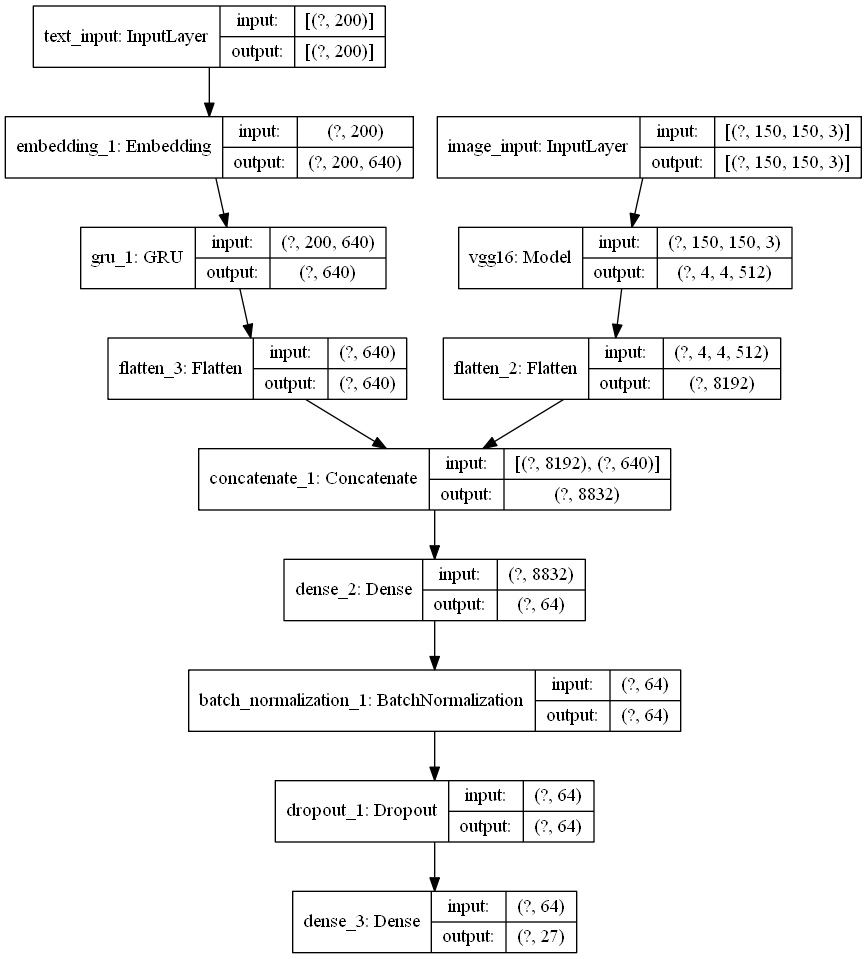

In [11]:
#instanciate a model with two input tensors and a classifier composed of 2 dense layers
multimodal_model4 = tf.keras.Model([image_input,text_input],outputs)
# summarize layers
print(multimodal_model4.summary())
tf.keras.utils.plot_model(multimodal_model4, show_shapes=True)

In [ ]:
import time
#CategoricalCrossentropy : Computes the crossentropy loss between the labels and predictions
#CategoricalAccuracy :  Calculates how often predictions match one-hot labels.
multimodal_model4.compile(
    optimizer=tf.keras.optimizers.Adam(), loss=[tf.keras.losses.CategoricalCrossentropy()],
    metrics=[tf.keras.metrics.CategoricalAccuracy()])

#callback to stop training phase when val_loss is no more decreasing
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                         patience=2,
                                         mode='min',
                                         restore_best_weights=True)

# training of the fucntional model multimodal (Image + text)
import time
traingen = CustomDataGen(df_train,
                         X_col_img={'nom_img':'nom_img'},
                         X_col_txt={'designation_str_tokens':'designation_str_tokens'},
                         y_col={'class_onehot': 'class_onehot'},
                         batch_size=32, input_size=(150, 150, 3),input_text_size=200)

print(type(traingen))

valgen = CustomDataGen(df_test,
                       X_col_img={'nom_img':'nom_img'},
                       X_col_txt={'designation_str_tokens':'designation_str_tokens'},
                       y_col={'class_onehot': 'class_onehot'},
                       batch_size=32, input_size=(150, 150, 3),input_text_size=200)

start = time.time()
history = multimodal_model4.fit(traingen,validation_data=valgen,epochs=10,callbacks=[early_stopping])
end = time.time()
elapsed = round((end - start)/60)

print(f'\ncell execution duration : {elapsed:.2f} mn')

multimodal_model4.save('Rakuten_multimodal_best_model_bis.h5')

<class '__main__.CustomDataGen'>
  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 2109 steps, validate for 527 steps
Epoch 1/10
1393/2109 [==================>...........] - ETA: 6:27 - loss: 1.4931 - categorical_accuracy: 0.5785

# Use case : image + text handling with a classifier composed of 3 Dense layers
 
**image chain : pretrained VGG16**<br>
**text chain : embedding + GRU layers**<br>

In [24]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import BatchNormalization

max_features=49507
# Modèle VGG16
base_model = VGG16(weights='imagenet', include_top=False,input_shape=(150,150,3))
# Freezer les couches du VGG16
for layer in base_model.layers: 
    layer.trainable = False


image_input = tf.keras.Input(shape=(150,150,3),name="image_input")
x = base_model(image_input)
encoded_image = Flatten()(x)

text_input = tf.keras.Input(shape=(200),name="text_input")
embedded_text = Embedding(max_features+1,640)(text_input)
y = GRU(640)(embedded_text)
encoded_txt = Flatten()(y)

# Concatenate both encoded images and text and pass through the classification layer.
#Normalization is mandatory for Neural Network with numerous hidden layers
#but this design pattern is anyway useful to ease weights calculation during descent gradient backpropagation
#the effect is visible for the first epoch for which the accuracy is much better comparing with same model without Normalization 
concatenated = tf.keras.layers.Concatenate()([encoded_image, encoded_txt])
classifier_lay1 = tf.keras.layers.Dense(64, activation="relu")(concatenated)
classifier_lay2 = tf.keras.layers.BatchNormalization()(classifier_lay1)
classifier_lay3 = tf.keras.layers.Dropout(0.2)(classifier_lay2)
classifier_lay4 = tf.keras.layers.Dense(128, activation="relu")(classifier_lay3)
classifier_lay5 = tf.keras.layers.BatchNormalization()(classifier_lay4)
classifier_lay6 = tf.keras.layers.Dropout(0.2)(classifier_lay5)
outputs = tf.keras.layers.Dense(27, activation="softmax")(classifier_lay6)

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_input (InputLayer)         [(None, 200)]        0                                            
__________________________________________________________________________________________________
image_input (InputLayer)        [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 200, 640)     31685120    text_input[0][0]                 
__________________________________________________________________________________________________
vgg16 (Model)                   (None, 4, 4, 512)    14714688    image_input[0][0]                
____________________________________________________________________________________________

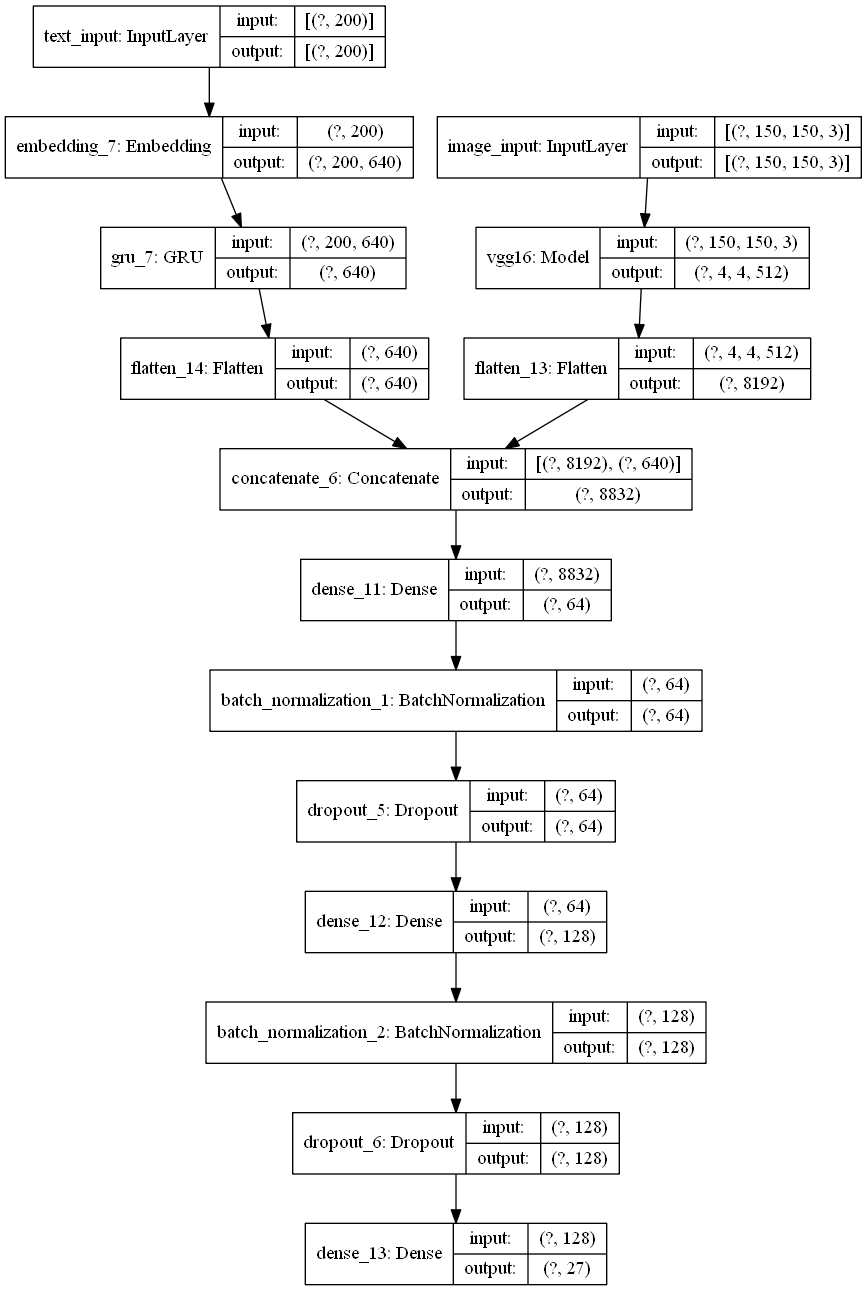

In [25]:
#instanciate a model with two input tensors and a classifier composed of 3 dense layers
# conclusion : not better than the dense classifier composed of only 2 layers
multimodal_model5 = tf.keras.Model([image_input,text_input],outputs)
# summarize layers
print(multimodal_model5.summary())
tf.keras.utils.plot_model(multimodal_model5, show_shapes=True)

In [26]:
import time
#CategoricalCrossentropy : Computes the crossentropy loss between the labels and predictions
#CategoricalAccuracy :  Calculates how often predictions match one-hot labels.
multimodal_model5.compile(
    optimizer=tf.keras.optimizers.Adam(), loss=[tf.keras.losses.CategoricalCrossentropy()],
    metrics=[tf.keras.metrics.CategoricalAccuracy()])


# training of the fucntional model multimodal (Image + text)
import time
traingen = CustomDataGen(df_train,
                         X_col_img={'nom_img':'nom_img'},
                         X_col_txt={'designation_str_tokens':'designation_str_tokens'},
                         y_col={'class_onehot': 'class_onehot'},
                         batch_size=32, input_size=(150, 150, 3),input_text_size=200)

print(type(traingen))

valgen = CustomDataGen(df_test,
                       X_col_img={'nom_img':'nom_img'},
                       X_col_txt={'designation_str_tokens':'designation_str_tokens'},
                       y_col={'class_onehot': 'class_onehot'},
                       batch_size=32, input_size=(150, 150, 3),input_text_size=200)

start = time.time()
history = multimodal_model5.fit(traingen,validation_data=valgen,epochs=10)
end = time.time()
elapsed = round((end - start)/60)

print(f'\ncell execution duration : {elapsed:.2f} mn')

<class '__main__.CustomDataGen'>
  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 2109 steps, validate for 527 steps
Epoch 1/10
2109/2109 [==============================] - 1062s 504ms/step - loss: 1.5783 - categorical_accuracy: 0.5420 - val_loss: 0.8633 - val_categorical_accuracy: 0.7358
Epoch 2/10
2109/2109 [==============================] - 1066s 505ms/step - loss: 0.7273 - categorical_accuracy: 0.7831 - val_loss: 0.6409 - val_categorical_accuracy: 0.8135
Epoch 3/10
2109/2109 [==============================] - 1058s 502ms/step - loss: 0.4379 - categorical_accuracy: 0.8689 - val_loss: 0.6284 - val_categorical_accuracy: 0.8244
Epoch 4/10
2109/2109 [==============================] - 1056s 501ms/step - loss: 0.2815 - categorical_accuracy: 0.9141 - val_loss: 0.6652 - val_categorical_accuracy: 0.8290
Epoch 5/10
2109/2109 [==============================] - 1053s 499ms/step - loss: 0.1950 - categorical_accuracy: 0.9409 - val_loss: 0.7629 - val_categorical_accuracy: 0.8244
Epoch 6/10
2109/2109 [==============================] - 1052s 499ms/step - loss: 0.1460 - 